# Семинар 6. Решающие деревья

![](https://drive.google.com/uc?id=13kmqLXa-3FBUJq0Q3XVOkz8TENpVTkqk)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM, CatBoost).

In [1]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()

In [ ]:
# feature1
# 0.2 0.3 0.4 0.5 0.6 0.7
# 0   0   0 |  1   1   1


def compute_threshold(feature):
    candidates = []
    for i in range(1, len(feature)):
        lhs, rhs = feature[:i], feature[i:]
        score = gini(lhs) + gini(rhs)
        candidates.append([score, i])
    return feature[min(candidates, key=lambda x: x[0])]

## Идеи метрик, которые можно использовать при оценке сплита:

- энтропия

$\sum_i^k p_i \log_2 \frac{1}{p_i}$

$\sum_i \alpha_i \cdot f(x_i) \leq f(\sum_i \alpha_i x_i)$


$\sum_i p_i \log_2 \frac{1}{p_i} \leq \log_2\sum_i^k(p_i \cdot 1/p_i)) = \log_2(k)$


- критерий Джинни

$1 - \sum_i^k p_i^2 \leq 1 - 1/k$ = $\sum_i \sum_j p_i * p_j$ 

- доля неправильных ответов

$\frac{1}{n} \cdot \sum_i^n[y_i \neq k^*] = 1 - p_{k^*}$,

$k^*$ — преобладающий класс, которым назначаются объекты в листе, 
$n$ —  число объектов, попавших в лист

- mse для регрессии (при прогнозе средним — это то же самое, что дисперсия ответов, попавших в лист)

## Линейные модели или решающие деревья?

Можно ли сказать, что какой-то из этих двух типов моделей всегда лучше? Нет. В зависимости от пространственной структуры данных, один из них будет работать лучше:

- Линейная модель, если данные хорошо линейно разделимы

- Решающие деревья, если данные плохо линейно разделимы (присутствуют только кусочно-линейные или нелинейные зависимости)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 6.5)

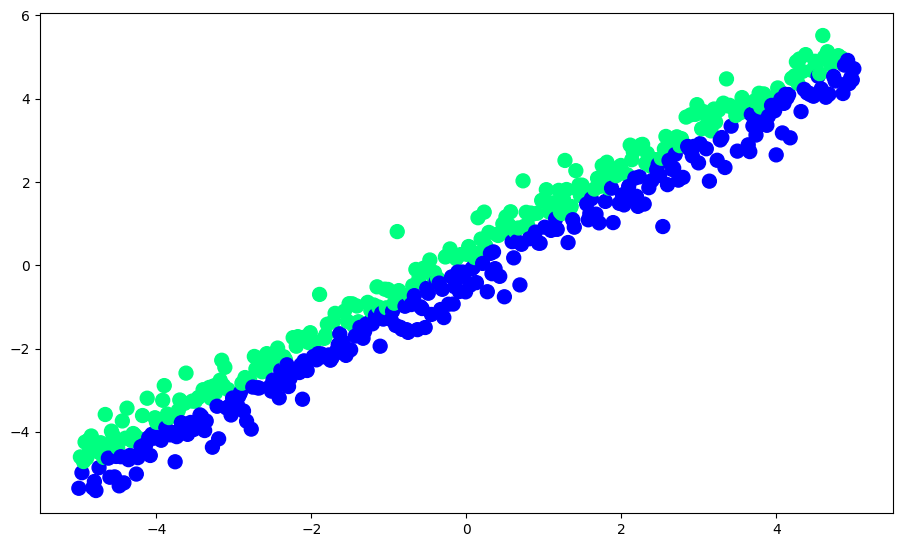

In [3]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

Linear model accuracy: 0.99


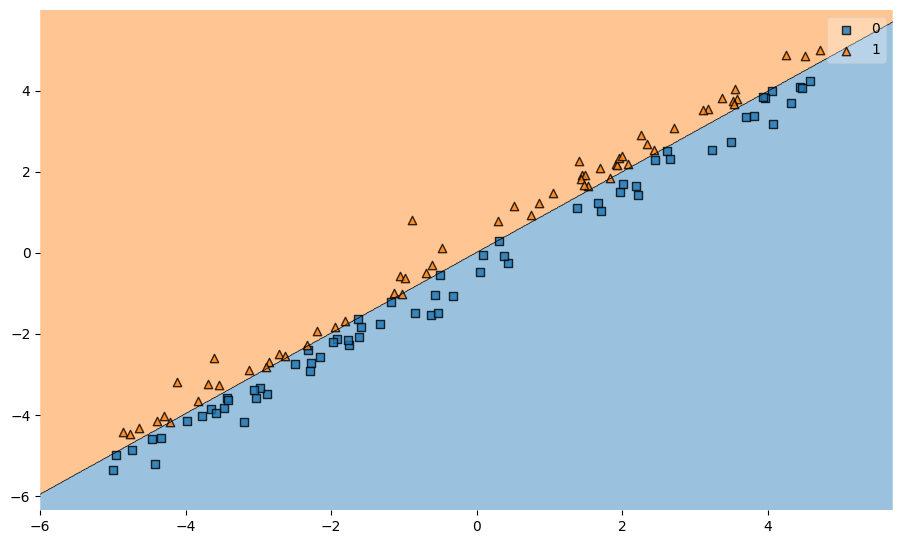

In [5]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)
plt.show()

Decision tree accuracy: 0.86


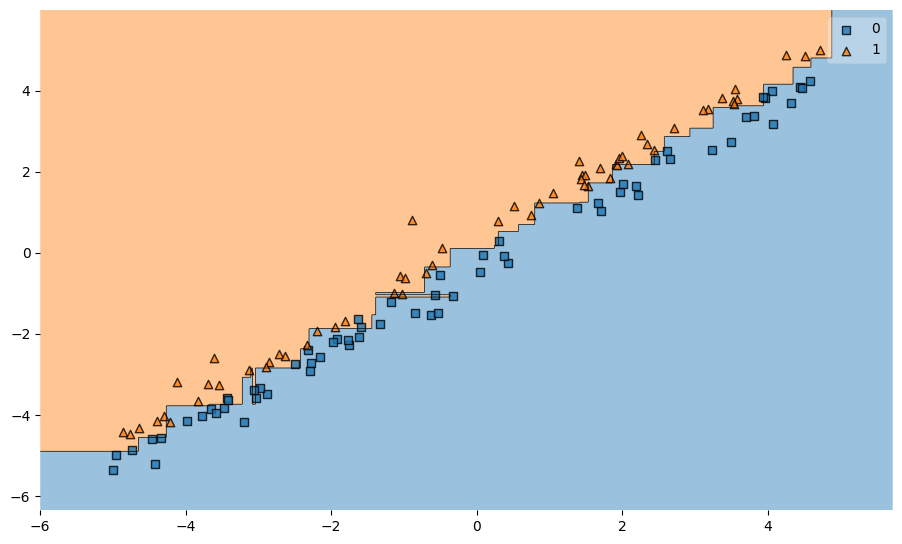

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

Catboost accuracy: 0.90


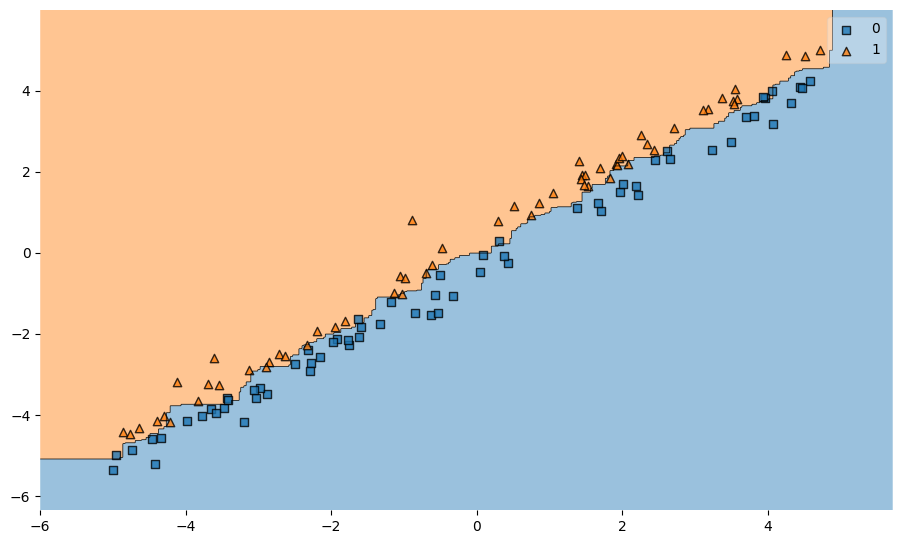

In [9]:
from catboost import CatBoostClassifier

dt = CatBoostClassifier(random_state=13, verbose=False)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Catboost accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

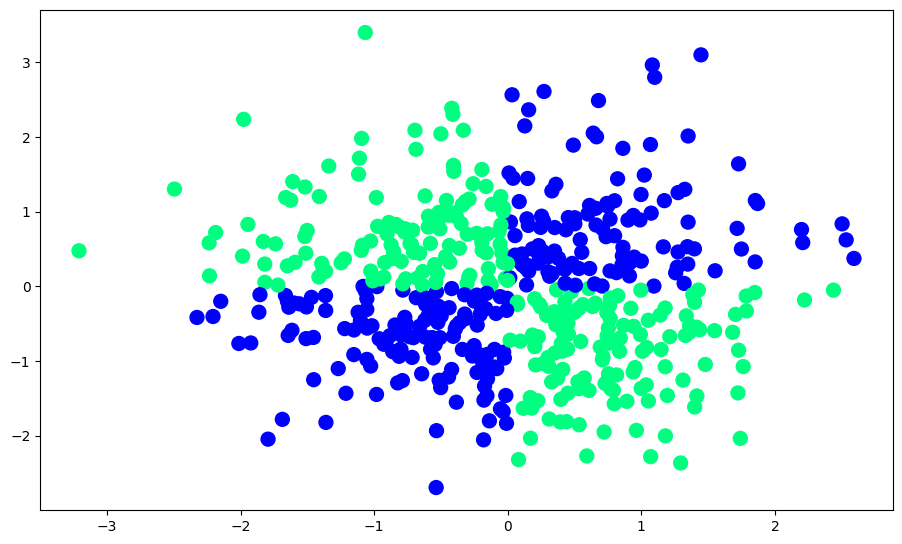

In [10]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Linear model accuracy: 0.39


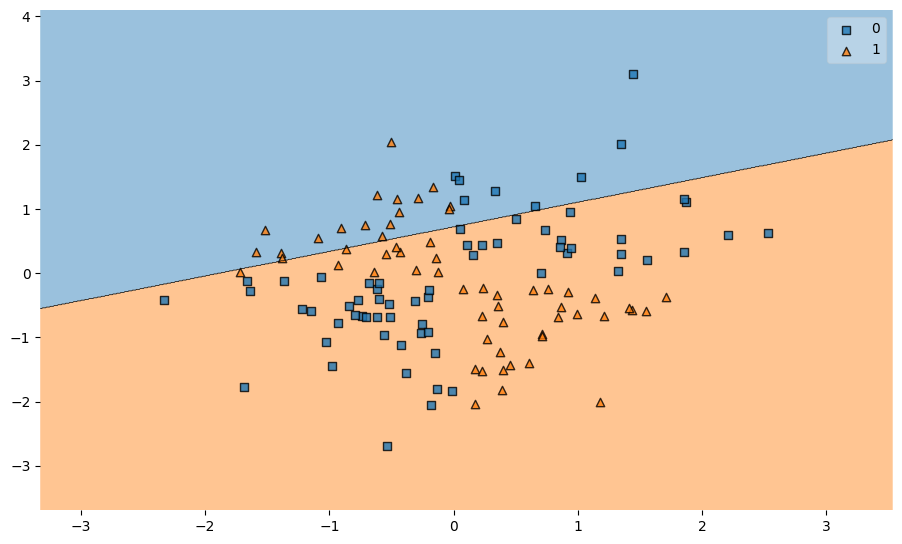

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr)
plt.show()

Decision tree accuracy: 0.97


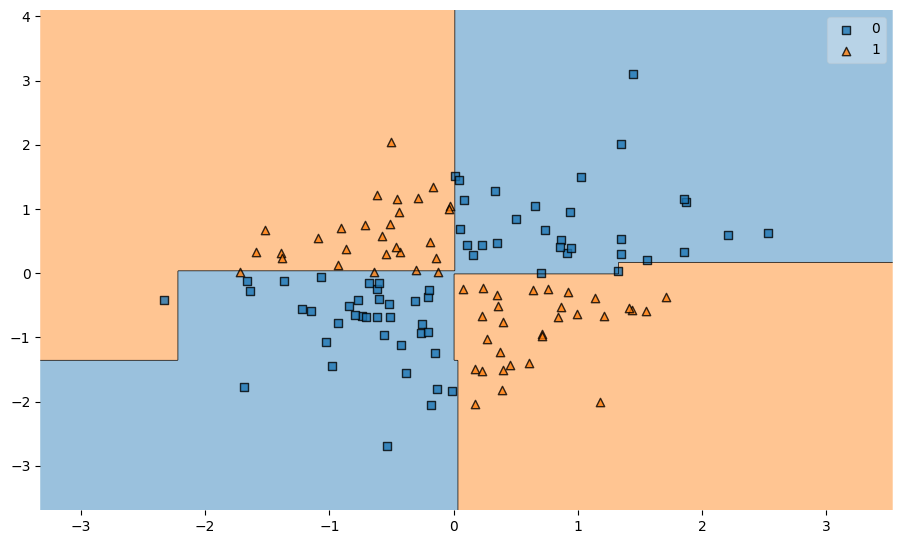

In [12]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

Catboost accuracy: 0.99


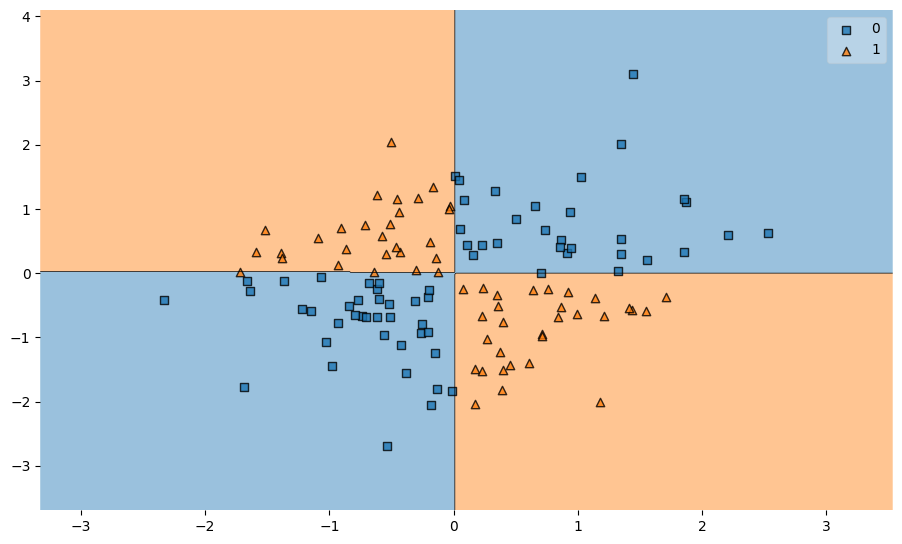

In [13]:
dt = CatBoostClassifier(random_state=13, verbose=False)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Catboost accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

Без регуляризации решающие деревья обладают фантастической способность к переобучению: можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке, выделив для каждого объекта отдельный листик.

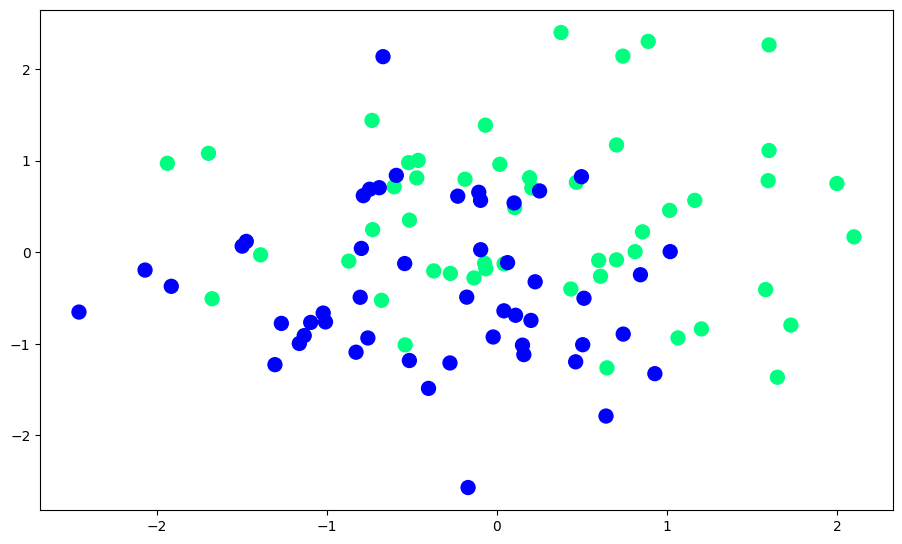

In [14]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Посмотрим, как влияют разные значения гиперпараметров решающего дерева на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она могла быть листовой. Другими словами, когда мы будем перебирать пороги для разбиения в конкретной вершине, мы будем рассматривать только такие пороги, после разбиения по которым каждая из двух новых вершин будет содержать не менее `min_samples_leaf` объектов.
- `min_samples_split`: минимальное число объектов во внутреннем узле, при котором мы будем делать разбиение этого листа. 

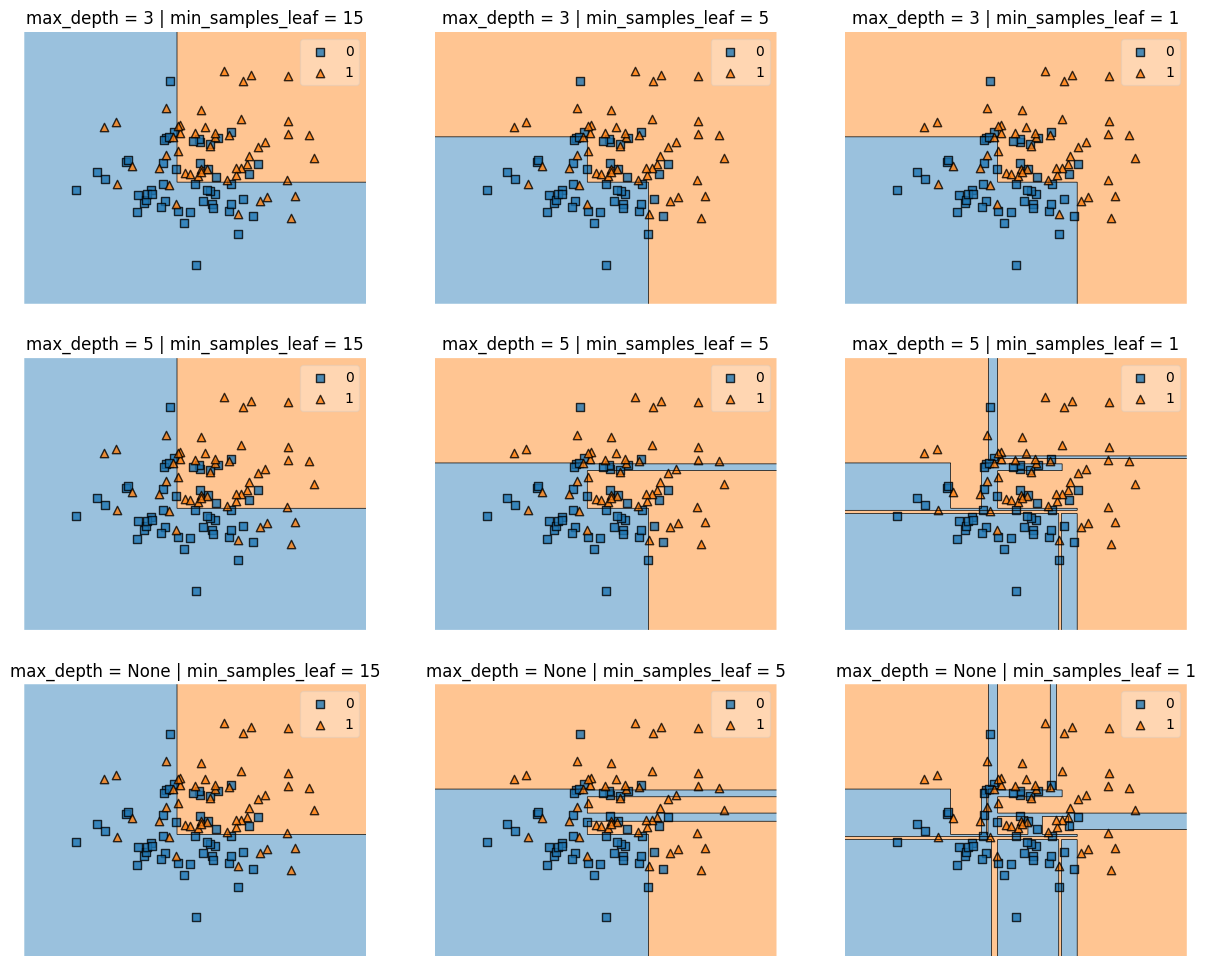

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])
        
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Decision tree accuracy: 1.00


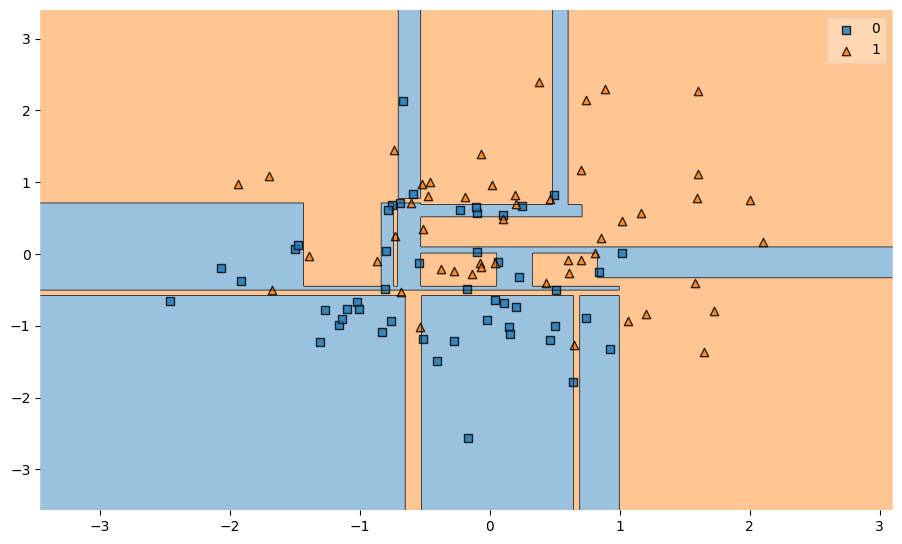

In [16]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=13)
dt.fit(X, y)

print(f"Decision tree accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, dt)
plt.show()

## Неустойчивость

Посмотрим, как будет меняться структура дерева без регуляризации, если брать для обучения разные 90%-ые подвыборки исходной выборки.

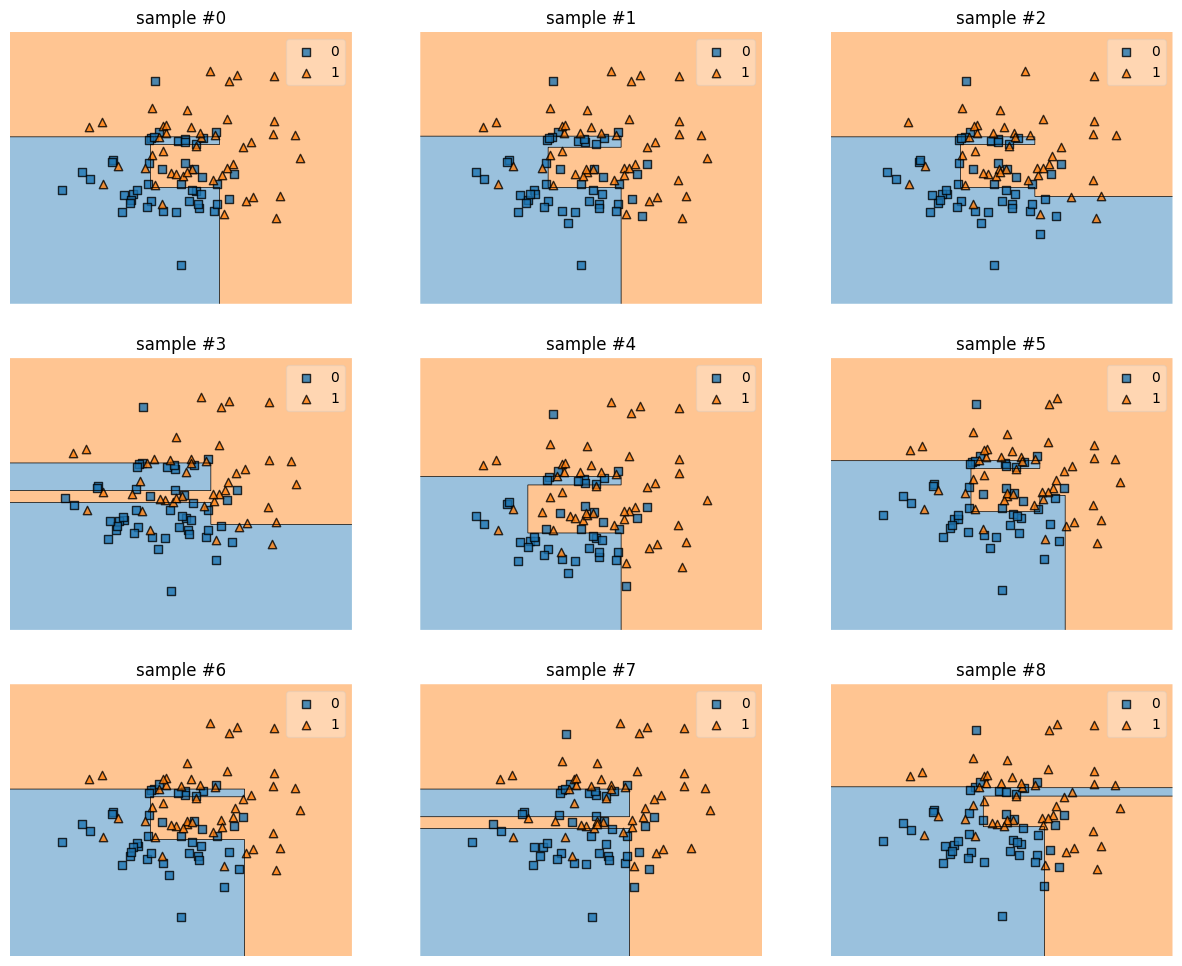

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
        
plt.show()

## Решающее дерево из sklearn

In [20]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [22]:
boston = load_boston()

In [23]:
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
X.shape

(506, 13)

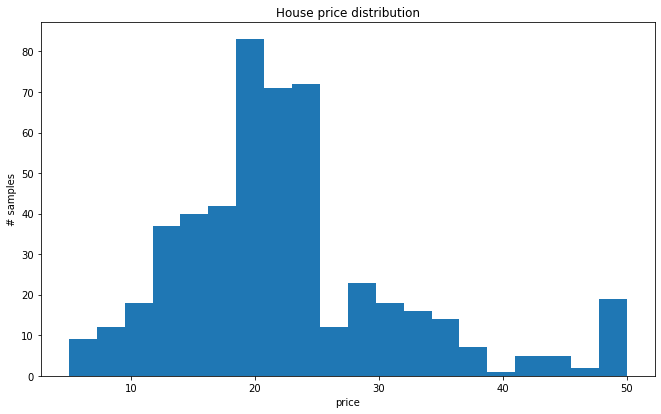

In [92]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

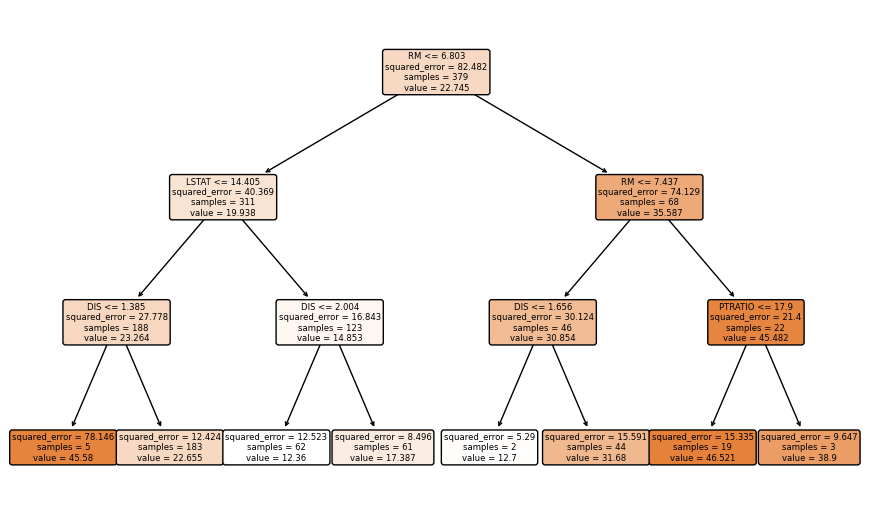

In [30]:
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

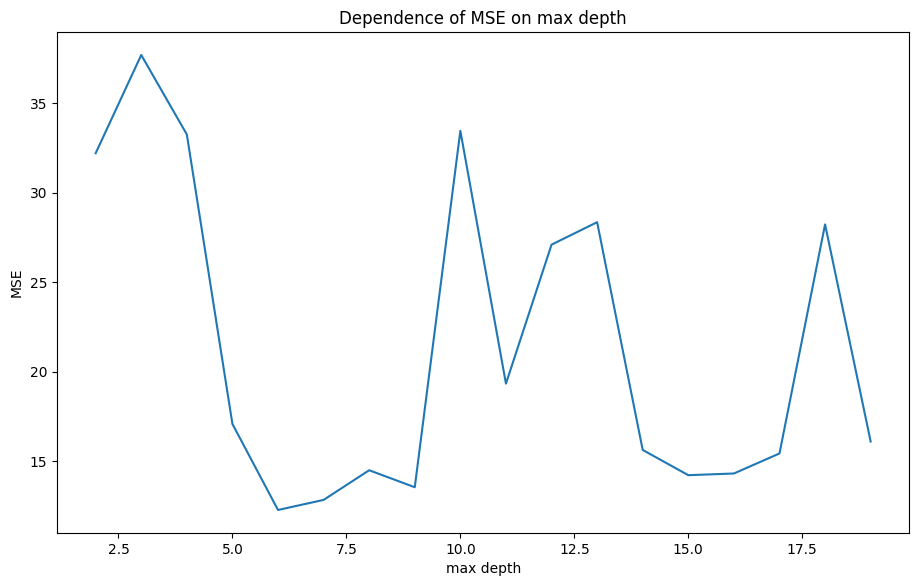

In [31]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [32]:
pd.DataFrame({
    "max_depth": max_depth_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599
5,8,14.481238
6,17,15.420090
7,14,15.616905
8,19,16.090492
9,5,17.071137


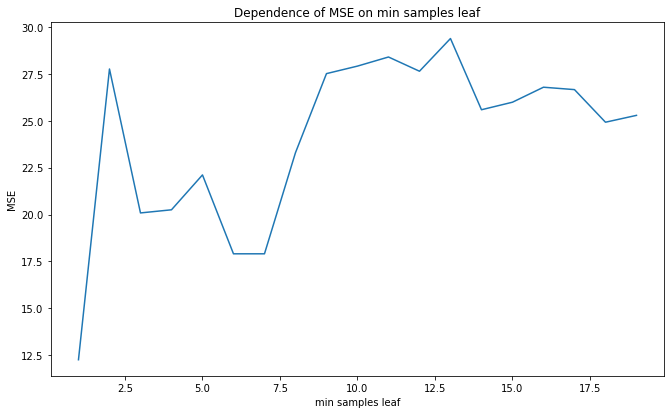

In [97]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
    
plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [98]:
pd.DataFrame({
    "min_samples_leaf": min_samples_leaf_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,min_samples_leaf,MSE
0,1,12.259769
1,6,17.908766
2,7,17.909083
3,3,20.088437
4,4,20.255276
5,5,22.115940
6,8,23.300598
7,18,24.925912
8,19,25.291371
9,14,25.590832


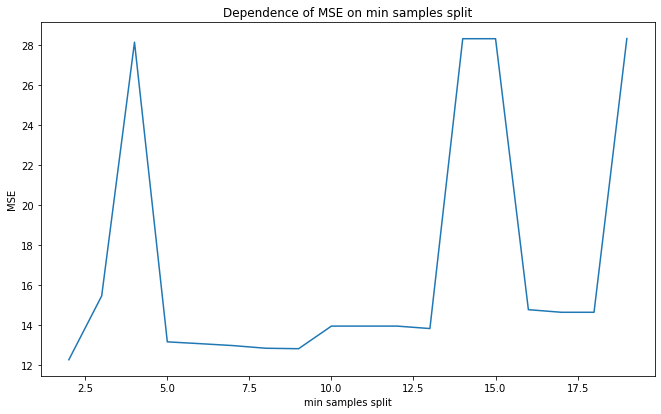

In [99]:
min_samples_split_array = range(2, 20)
mse_array = []

for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_split_array, mse_array)
plt.title("Dependence of MSE on min samples split")
plt.xlabel("min samples split")
plt.ylabel("MSE")
plt.show()

In [100]:
pd.DataFrame({
    "min_samples_split": min_samples_split_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,min_samples_split,MSE
0,2,12.259769
1,9,12.811753
2,8,12.834285
3,7,12.967391
4,6,13.063227
5,5,13.154081
6,13,13.819368
7,12,13.942143
8,11,13.942143
9,10,13.942143


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=13),
                  param_grid={
                      'max_features': ['auto', 'log2', 'sqrt'],
                      'max_depth': list(range(2, 20)) + [None],
                      'min_samples_leaf': list(range(1, 20)) + [None]
                  },
                  cv=5,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

In [51]:
gs.best_params_

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 3}

12.259769039156408


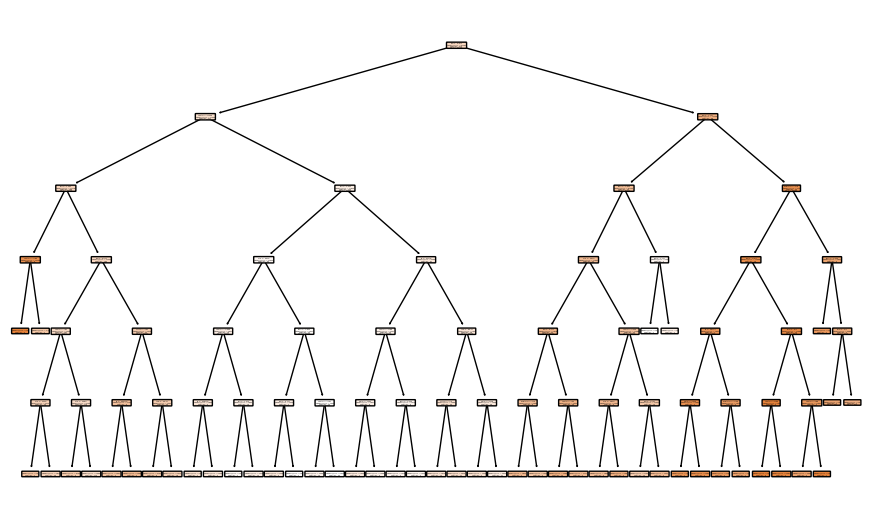

In [47]:
dt_our_best = DecisionTreeRegressor(max_depth=6, random_state=13)
dt_our_best.fit(X_train, y_train)
print(mean_squared_error(y_test, dt_our_best.predict(X_test)))

plot_tree(dt_our_best, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [48]:
dt_gs_best = DecisionTreeRegressor(max_depth=11,  min_samples_leaf=3, random_state=13)
dt_gs_best.fit(X_train, y_train)
mean_squared_error(y_test, dt_gs_best.predict(X_test))

19.901522698930126

### Важность признаков

In [52]:
df_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

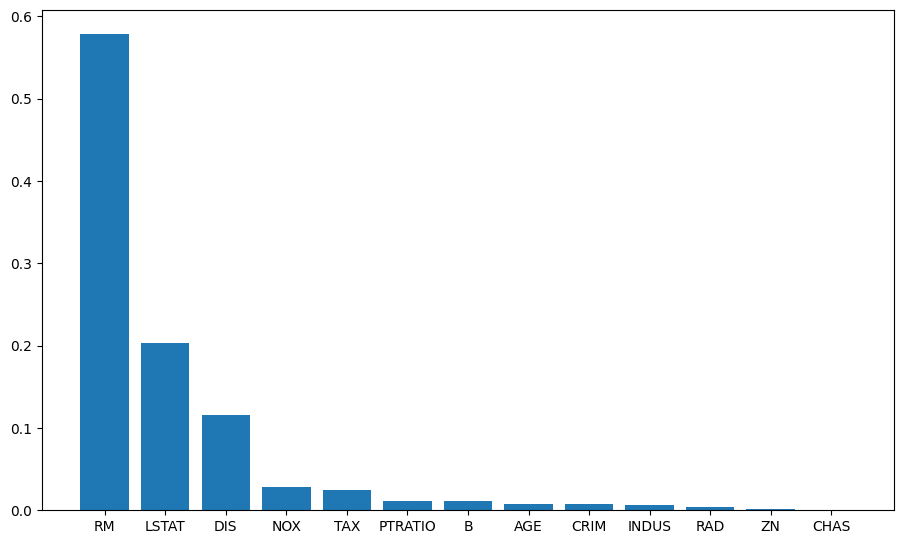

In [53]:
plt.bar(df_importances['feature'], df_importances['importance'])
plt.show()

Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [110]:
print("No scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test)):.2f}")

No scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26


In [111]:
print("Standard scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test_scaled)):.2f}")

Standard scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26


## Скетч решающего дерева

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

In [114]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
X["target"] = boston["target"]

In [118]:
X[X['ZN']<0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Задание 1**: реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины.

In [120]:
from typing import Iterable, List, Tuple

def H(R: np.array) -> float:
    """
    Compute impurity criterion for a fixed set of objects R.
    Last column is assumed to contain target value
    """
    pass


def split_node(R_m: np.array, feature: str, t: float) -> Iterable[np.array]:
    """
    Split a fixed set of objects R_m given feature number and threshold t
    """
    pass


def q_error(R_m: np.array, feature: str, t: float) -> float:
    """
    Compute error criterion for given split parameters
    """
    pass

**Задание 2**: переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога.

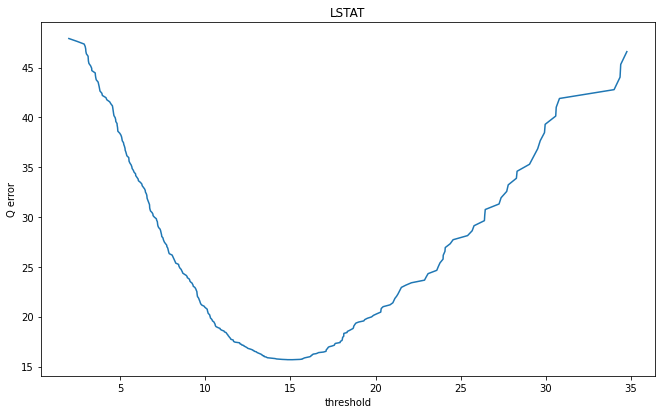

In [129]:
feature = "LSTAT"
Q_array = []

feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))

plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.show()

In [130]:
feature_values[np.argmin(Q_array)]

14.98

**Задание 3**: Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку.

In [131]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, List[float]]:
    pass

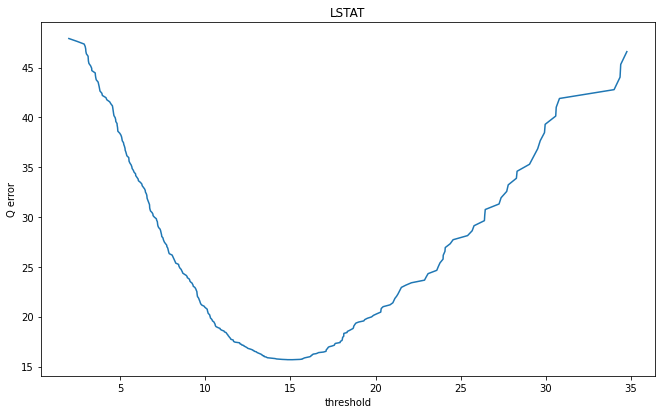

In [132]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.show()

**Задание 4**: Для первого разбиения найдите признак, показывающий наилучшее качество. Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога.

In [134]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
74,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11


In [136]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [140]:
thr = pd.DataFrame(results, columns=["feature", "optimal t", "min Q error"])

In [141]:
optimal_feature, optimal_t, optimal_error = thr.iloc[1, :]

 **Задание 5**: Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения.

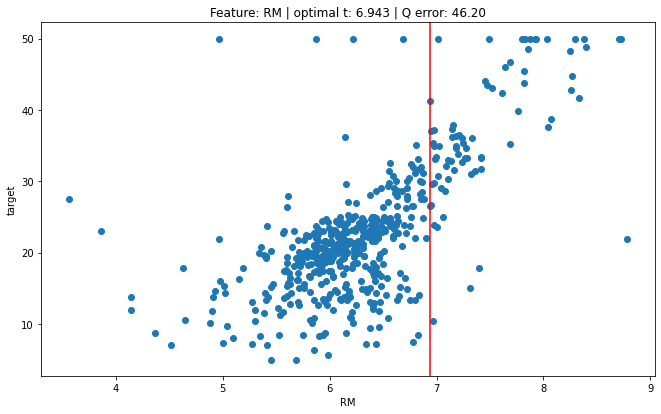

In [142]:
# Your code goes here

## Таргет с несколькими аутпутами

In [14]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import numpy as np

Разделим датасет так, чтобы на обучении и тесте были разные люди.

In [34]:
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  


n_faces = 5
face_ids = np.random.choice(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

In [35]:
data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

Будем восстанавливать нижнюю часть картинки по верхней.

In [36]:
n_pixels = data.shape[1]
X_train = train[:, : (n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

In [37]:
y_train.shape # для каждой картинки хотим уметь восстанавливать 2048 пикселей

(300, 2048)

In [38]:
img_shape = (64, 64)

In [39]:
halved_example = data[0].copy()
halved_example[(n_pixels + 1) // 2:] = 1

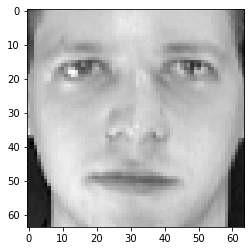

In [40]:
plt.imshow(data[0].reshape(img_shape), cmap=plt.cm.gray)

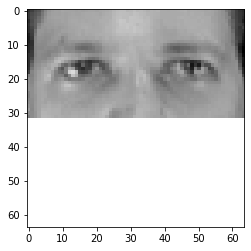

In [41]:
plt.imshow(halved_example.reshape(img_shape), cmap=plt.cm.gray)

In [38]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

In [39]:
prediction = etr.predict(X_test)

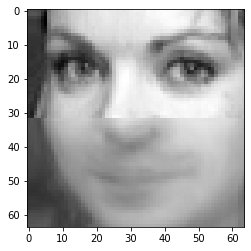

In [63]:
plt.imshow(np.hstack((X_test[0], prediction[0])).reshape(img_shape), cmap=plt.cm.gray)
plt.show()

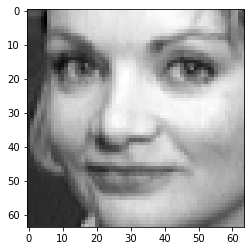

In [65]:
plt.imshow(np.hstack((X_test[0], y_test[0])).reshape(img_shape), cmap=plt.cm.gray)
plt.show()